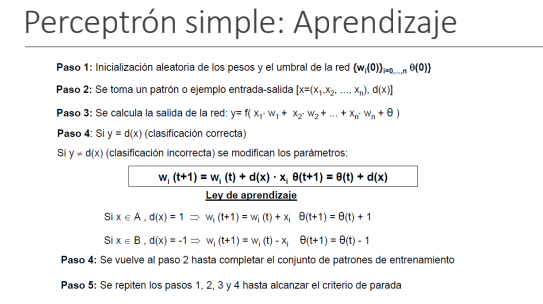

# Código

In [5]:
def fit(X, D, alpha, niter):
    # X = nsamples x n_features
    # D = 1 x neuronas
    # W  = n_features x n_outputs
    # theta = 1 x neuronas
    nsamples = np.shape(X)[0]
   # print(nsamples)
    n_features = np.shape(X)[1]
  #  print(n_features)
    n_outputs = np.shape(D)[1]
 #   print(n_outputs)
    
    W = np.random.rand(n_features,n_outputs)
    
    theta = np.random.rand(n_outputs) 
    bias = 1
    
    Y = np.zeros((nsamples,n_outputs))## predicción

    for i in range(niter):
        for s in range(nsamples):
            X_s = X[s] # patrón de entrada
            Y_s = Y[s] # prediccion
            D_s = D[s] # patrón de salida
            for o in range(n_outputs): # número de neuronas
                for f in range(n_features): ## número de pesos
                    Y_s[o]+= W[f][o]*X_s[f]
                Y_s[o] +=  theta[o]
                Y_s[o] = np.where(Y_s[o]>=0,1,-1)
                
                if Y_s[o] !=  D_s[o]:
                    for f in range(n_features):
                        W[f][o] +=  (alpha * (D_s[o]*X_s[f]))
                        
                    theta[o] += (alpha *D_s[o])

    return W, theta

Una vez con W y theta se calcula el hiperplano solución, para comprobar un patrón de prueba se multiplica $\sum_{i=1}w_{i}*x_{i}+\theta_{i}$

# AND

0 --> -1

| $x_{1}$ | $x_{2}$ | AND |
| --- | --- | --- |
| -1 | -1| -1 |
| -1 | 1 | -1 |
| 1 | 1 | 1 |
| 1 | -1 | -1|

In [12]:
import numpy as np

patrones_de_prueba = np.array([[-1,-1],
              [-1,1],
              [1,1],
              [1,-1] ])
patrones_de_prueba

array([[-1, -1],
       [-1,  1],
       [ 1,  1],
       [ 1, -1]])

In [13]:
target = [[-1],[-1],[1],[-1]]

In [14]:
W_and, theta_and = fit(patrones_de_prueba, target, 0.01,500)

In [15]:
W_and, theta_and 

(array([[0.64709623],
        [0.57818693]]),
 array([-0.95763588]))

In [16]:
## comprobar un patrón

In [17]:
np.where(((W_and[0]*-1) + (W_and[1]*1) +theta_and)>=0,1,-1)

array([-1])

In [18]:
## En 2d es posible encontrar la ecuación de la recta

In [19]:
m = W_and[0]/W_and[1]
b = (theta_and[0] / W_and[1])

In [20]:
#points of the line
#y = m*x + b
#[m*x for x in np.linspace(-1,1)]

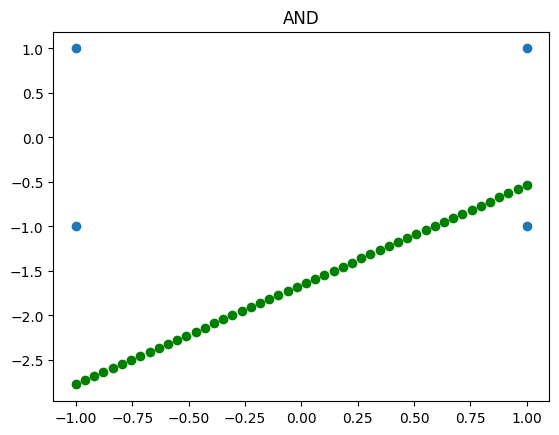

In [21]:
import matplotlib.pyplot as plt
plt.scatter(np.linspace(-1,1), [m*x+b for x in np.linspace(-1,1)], color = 'green')
plt.scatter(patrones_de_prueba[:, 0], patrones_de_prueba[:, 1])
plt.title('AND')
plt.show()

# OR 

In [22]:
import numpy as np

patrones_de_prueba = np.array([[-1,-1],
              [-1,1],
              [1,1],
              [1,-1] ])
patrones_de_prueba

array([[-1, -1],
       [-1,  1],
       [ 1,  1],
       [ 1, -1]])

In [23]:
target = [[-1],[1],[1],[1]]

In [24]:
W_or, theta_or = fit(patrones_de_prueba, target, 0.001,50)

In [25]:
np.where(((W_or[0]*1) + (W_or[1]*-1) +theta_or)>=0,1,-1)

array([1])

In [26]:
m = W_or[0]/W_or[1]
b = theta_or[0] / W_or[1]

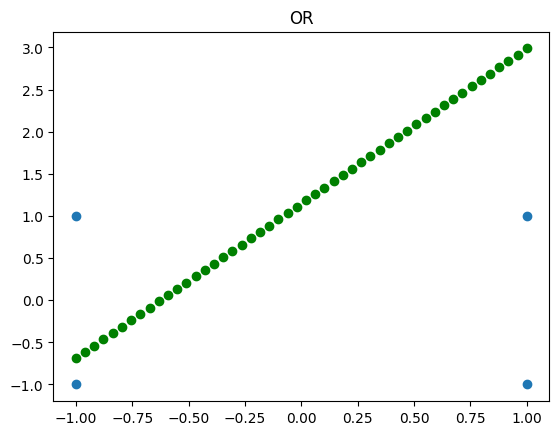

In [27]:
import matplotlib.pyplot as plt
plt.scatter(np.linspace(-1,1), [m*x+b for x in np.linspace(-1,1)], color = 'green')
plt.scatter(patrones_de_prueba[:, 0], patrones_de_prueba[:, 1])
plt.title('OR')
plt.show()

# XOR

In [28]:
target = [[-1],[1],[1],[-1]]

In [29]:
W_xor, theta_xor = fit(patrones_de_prueba, target, 0.001,50)

In [30]:
np.where(((W_xor[0]*1) + (W_xor[1]*1) +theta_xor)>=0,1,-1)

array([1])

In [31]:
m = W_xor[0]/W_xor[1]
b = theta_xor[0] / W_xor[1]

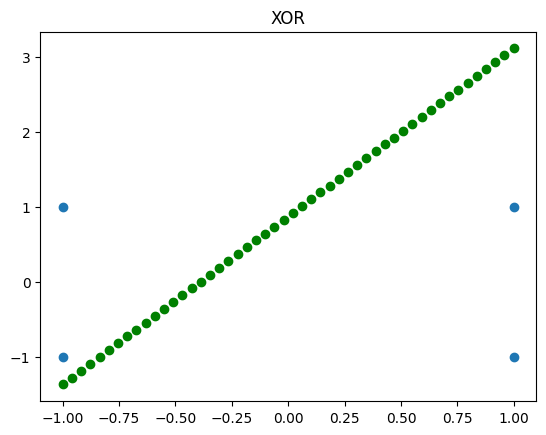

In [32]:
import matplotlib.pyplot as plt
plt.scatter(np.linspace(-1,1), [m*x+b for x in np.linspace(-1,1)], color = 'green')
plt.scatter(patrones_de_prueba[:, 0], patrones_de_prueba[:, 1])
plt.title('XOR')
plt.show()

# Bibliotecario

Un bibliotecario tiene una base de datos de 500,000 libros aproximadamente, necesIta clasificar en 4 conjuntos mediante dos criterios, peso y frecuencia de uso. Esto es para decidir en que parte de la biblioteca serán colocados. La base de datos contiene el peso y la frecuencia de uso de cada libro. DIseñe y programe una red neuronal perceptrón para que automáticamente clasifique los libros, considere los siguientes patrones de prueba


| Clases | Peso y Frecuencia de Uso (# prestamos/mes) |   |
| --- | --- | --- |
| Ligeros y poco usados | $P_{1}$ = [0.73,3] | $P_{2}$ = [1.5,5] |
| Ligeros y muy usados | $P_{3}$ = [2.0,9] | $P_{4}$ = [0.9,11] |
| Pesados y poco usados | $P_{5}$ = [4.2,0] | $P_{6}$ = [2.2,1] |
| Pesados y muy usados | $P_{7}$ = [3.6,7] | $P_{8}$ = [4.5,6] |

Puede diseñarse un perceptron con dos entradas y dos salidas (pesado, usado)?, se puede definir entonces:

| $X_{1}$ | $X_{2}$ | Pesado  | Muy Usado|
| --- | --- | --- |--- |
| 0.73 | 3 | 0 | 0|
| 1.5 | 5 | 0 | 0|
| 2.0 | 9 | 0 | 1|
| 0.9 | 11 | 0 | 1|
| 4.2 | 0 | 1 | 0|
| 2.2 | 1 | 1 | 0|
| 3.6 | 7 | 1 | 1|
| 4.5 | 6 | 1 | 1|

https://medium.com/@becaye-balde/perceptron-building-it-from-scratch-in-python-15716806ef64

$W_{1} = [W_{11},W_{12}]$, 
$W_{2} = [W_{21},W_{22}]$, 
$d_{i} = [d_{i1},d_{i2}]$, 
$X_{i} = [X_{i1},X_{i2}]$

In [33]:
import numpy as np

In [34]:
patrones_de_prueba =  np.array([[0.73, 3],
              [1.5 , 5] ,
              [2.0 , 9 ],
              [0.9 , 11] ,
              [4.2 , 0 ],
             [2.2 , 1],
             [3.6 , 7],
           [4.5 , 6]])

In [35]:
target = np.array([[-1 , -1],
             [-1 , -1],
           [-1 , 1],
         [-1 , 1],
         [1 , -1],
           [1 , -1],
       [1 , 1],
        [1 , 1]])

In [60]:
W_lib, theta_lib = fit(patrones_de_prueba, target, 0.0001,1000)

In [61]:
np.where(((W_lib[0][0]*2.0) + (W_lib[1][0]* 0.9) +theta_lib[0])>=0,1,-1)

array(1)

In [62]:
np.where(((W_lib[0][1]*2.0) + (W_lib[1][1]* 9) +theta_lib[1])>=0,1,-1)

array(-1)

In [63]:
W_lib

array([[ 0.77610139, -0.34990162],
       [-0.48495438, -0.00293687]])

In [64]:
m1 = W_lib[0][0]/W_lib[1][0]
b1 = (theta_lib[0] / W_lib[1][0])

In [65]:
m2 = W_lib[0][1]/W_lib[1][1]
b2 = (theta_lib[1] / W_lib[1][1])

In [66]:
l1 = [(m1*x)+b1 for x in np.linspace(0,5)]
l2 = [(m2*x)+b2 for x in np.linspace(0,5)]

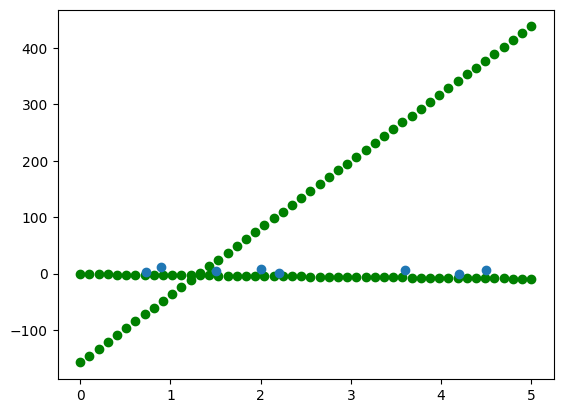

In [67]:
import matplotlib.pyplot as plt
plt.scatter(np.linspace(0,5), l1, color = 'green')
plt.scatter(np.linspace(0,5), l2, color = 'green')
plt.scatter(patrones_de_prueba[:, 0], patrones_de_prueba[:, 1])
plt.show()

# 7 segmentos

In [6]:
## pares

In [7]:
import numpy as np
patrones_de_prueba =  np.array([[1,1,0,1,1,0,1],
              [0,1,1,0,0,1,1] ,
              [1,0,1,1,1,1,1],
              [1,1,1,1,0,1,1]])

In [8]:
target = np.array([[1,-1,1],
             [1 ,-1,-1],
           [1,1, -1],
         [1,1,-1]])

In [9]:
W_seg, theta_seg = fit(patrones_de_prueba, target, 0.0001,1000)

In [10]:
W_seg

array([[ 0.58773612,  0.43304624,  0.62907515],
       [ 0.31201419, -0.18221332,  0.04606563],
       [ 0.36408922,  0.38567824,  0.63913394],
       [ 0.35431857,  0.84191932,  0.35371063],
       [ 0.19607201,  0.14558895,  0.02314239],
       [ 0.60783114,  0.18753329, -0.22932542],
       [ 0.88928721,  0.06910641, -0.23117262]])

In [11]:
theta_seg

array([0.51844099, 0.35067861, 0.64014795])